# Linear Regression - some Theory
1. Include intercept in formulars.
2. Speficy loss function
2. Write down log Likelihood function
3. Minimize + get Normal equation

### Approach 1: Non-probabilisitc using loss function
The easies approach to linear regression is to use the squared loss function, 
$$l = \sum_{i=1}^N (y_i - \hat y_i)^2,$$
where $\hat y_i$ is the predicted value and $y_i$ is the true value of sample $i$. Together with a linear, non probabilistic model for the. For feature vector $x_i$ (where the first component is per convention the constant one -aka known as intercept) the prediction is given by the linear model. In scalar product notation:
$$y_i =  x_i^T \theta,$$
with coefficient vector $\theta$. Rewriting this in Matrix notation to account for all sampels we get for the loss together with the linear model:
$$l = (Y - X\theta)^T (Y - X\theta)$$
Now we would like to find $\theta^*$ that _minimizes_ the loss. 
Setting the derivative w.r.t. $\theta$ of the loss function zero  gives the normal equation 
$$X^T(Y - X\theta) = 0.$$
If $X^T X$ is non-singular (this is the case when there are more traning examples than features because then $X^T X$ is positive definite) allows for finding the unique solutions of the normal equation, 

$$\theta ^* =  \left( X^T X  \right)^{-1} X^T Y$$

Note that this approach is non-probabilistic and thus, does not explicitly account for uncertainty  (as a probability distributions) in the data and coefficients.
### Approach 2: Probabilistic  +  generative approach using max likelihood
This approach introduces a probability distribution but does not explicitly consider a loss function. The  response is modelled  via a Normal distribution ("Gauss error") assuming constant standard deviation
$$y_i = x_i^T \theta + \epsilon := \mathcal N (x_i^T \theta, \sigma^2)$$
In other words, the conditional distribtion  $p(y \mid x, \theta, \sigma^2)$ is given by a Normal distribtion.
The likelihood function is just the pdf of __all__ datapoints assuming i.i.d (this assumption in fact leads to the factorization), 
$$\mathcal L = \Pi_{i=1}^N p(y_i \mid x, \theta, \sigma).$$
As we are aiming to optimize $\theta$ in a way, a striclty monotonic transformation is applied on the likelihood function. It leaves the optimum invariant. The standard procedure is thus to consider the the logarithm ot likelihood function:
$$\mathcal L_l = \sum_{i=1}^N \log p(y_i \mid x, \theta, \sigma).$$
Evaluating this expression for the Normal distribution gives
$$\mathcal L_l =  - \frac{1}{2\sigma^2}\sum_{i=1}^N (y_i - x_i^T \theta)^2  - \frac{N}{2}log(2\pi\sigma^2) $$
Now, we would like to _maximise_ the likelihood and thus the log likelihood with respect to $\theta$. This is equivalent to _minimizing_ the negative of it. Throwing away terms that, don't depend on $\theta$ gives the function for which we would like to find the minimizer. That is we want to solve this expression, 
$$\text{argmin}_\theta\left( Y - X \theta \right )^T \left( Y - X \theta \right ),$$
where we have rewritten the sum of squares over all training data again in Matrix notation. But this is exactly the same problem as in approach one and this gives the same solution (under the same circumstances), 

$$\theta ^* =  \left( X^T X  \right)^{-1} X^T Y$$

**Remarks**
* Note that this procedure only puts a probablilty distribution on the response $y$ while treating the remaining ingredients as variables (via the conditional pdf Ansatz). 
* This already implies that in this context the solutions $\theta^*$ just tell how the pdf is parametrized (not even completely as we did not consider the optimum value of $\sigma$).
* In either case this approach does not really tell us how to predict a specific value $y$ for a given $x$. It just tells us the corresponding distribution of $y$. The fundamental reason is that we did not make any use of a loss function in this approach. 
* Pragmatically and in practice  of course, the prediction is made by plugging into the linear model as e.g. in the first appraoch
* Note that a constant value for $\sigma$ is called homoscedasticity. This implies that the variance does may not be a function of the features but only the mean within the Normal model for the response.
* Furhtermore note that this approach does not consider uncertainties in the paramters. This would eventually require a Bayesian approach. 


### Bayesion models for linear regressions
#### Model specification 
For a Bayesion approach we need the generative model from above 
$$y_i = x_i^T \theta + \epsilon := \mathcal N (x_i^T \theta, \sigma^2)$$
Together with a Prior for the model parameters: 
$$p(\theta) := \mathcal N (\theta | \mu_0, \Sigma_0) $$

* So the **prior** of $\theta$ is itself parametrized by a mean $\mu_0$ and $\Sigma_\0$. 
* As the normal distribution is conjugate to itself this choice will eventually yield analytic solutions.  
* In this model we _assume_ that $\sigma^2$ is known. We only want to learn the posterior for the model parameters $\theta$


#### Several classes of Bayesian models
* In general the class of different models is obtained by
* Different prior assumptions on the model paramaters. I.e., further constraining the prior $p(\theta)$



#### Inference 
* Corresponds to finding the posterior on the weights (given the data). 
* The basic ingredient for the joint (that in turn leads to the posterior) is the likelihood over all data as given above and the prior.

$$p(\theta | \mathcal D, \sigma^2, \mu, \Sigma) \propto \mathcal N (y | X^T\theta, \sigma^2) \mathcal N (\theta | \mu, \Sigma) = \mathcal N (\theta | \mu_\theta, \Sigma_\theta)  $$ 
* This gives again a Normal distribution with parameters 
$$\Sigma_\theta :=  \left( \Sigma_0^{-1}  + \frac{1}{\sigma^2}X^TX\right)^{-1}$$
$$\mu_\theta := \Sigma_\theta \Sigma_0^{-1}\mu_0 + \frac{1}{\sigma^2}\Sigma_\theta X^Ty$$



#### Prediction
* Corresponds to finding the pdf of a new $y^*$ given a new $x^*$ the historic data $\mathcal D$, and (prior) model assumptions, $\sigma^2$, $\Sigma_0$, and $\mu_0$. 

$$p(y^* | x^*, \mathcal D, \sigma, \Sigma_0,  \mu_0) = \int d\, \theta ~ p(y^* | x^*, \theta, \sigma ) p(\theta | \mathcal D, \Sigma_0, \mu_0) \\ 
= \int d \theta \, \mathcal N(y^* | x^{*T}\theta, \sigma^2 ) \,  p(\theta | \mathcal D, \Sigma_0, \mu_0) \\ 
= \mathcal N (y^* | x^{*T}\mu_\theta, ~  \sigma^2 + x^{*T} \Sigma_\theta x^{*}) $$ 

* So the expectation value of this prediction is given by the expectation value of the  $\theta$-posterior, $\mu$
* The variance is determined by two contributions: 
    - by the apriori assumed variance of the observation noise $\sigma^2$
    - the variance in the parameters $\Sigma$. 
* The latter contribution depends on how close a new datapoint is to the the training points.


#### Remarks
* So far it is assumed that $\sigma$ is known. If we relax this requirement and try to learn $\sigma$ as well than still a analytic solutions exist (see Murphy Chap 7.6.3 and 4.6.3). 
* But for the time beeing we assume that $\sigma^2$ is known. 
* In the follwing we are treating special cases of the Bayesian approach presented so far

### Apporach 4: Uncorrelated Bayesian Approach
A Bayesian linar regression is a straightforward generalization, 
#### The model:
Generative Process: $$y_i = x_i^T \theta + \epsilon \propto \mathcal N (y_i  | x_i^T \theta, \sigma^2)$$
Prior on model Parameters: $$p(\theta)  \propto \mathcal N (\theta | 0, \lambda ^{-1} \mathbb 1 ) $$

Making contact to the general case above we have: 
$$
\Sigma_0 =  \lambda ^{-1} \mathbb 1 \\ 
\mu_0 = 0 $$


#### Learning
*  Follows from the general case above:  
$$p(\theta | X, \sigma^2, \lambda) = \mathcal N \left(\theta ~ |~ \mu_\theta, \Sigma_\theta\right)$$
with 
$$\mu_\theta = \left(X^TX + \lambda \sigma^2 \mathbb 1\right)^{-1}X^TY$$
$$\Sigma_\theta =  \left( \lambda \mathbb 1 + \frac{1}{\sigma^2} X^TX\right)^{-1}$$
* Note the feature correlation term the makes the posterior correlated!

#### Inference 
Is given by the general case above
$$p(y^* | x^*, \sigma^2, \lambda, \mathcal D)= \mathcal N (y^* | x^{*T}\mu_\theta, ~  \sigma^2 + x^{*T} \Sigma_\theta x^{*})$$

#### Ridge Regression as limiting case
* Learning
* $\lambda \sigma ^2 \rightarrow \lambda$ (regularization parameter)
* $\langle p(\theta ~|~ \mathcal D, \lambda, \sigma^2) \rangle = \left(XX^T + \lambda \mathbb 1 \right)XY$ Estimator of ridge regression
* Prediction
* $\langle p(y^* ~|~ x^* \sigma^2 \lambda, \mathcal D)\rangle = \theta^T x^*$ (= Ridge Regression prediction)



### Remarks
References:
- Murphy, Chap. 7
- [Georg](https://github.com/yedivanseven/Bayesian/blob/master/LinearFit.ipynb)
- https://brendanhasz.github.io/2018/12/03/tfp-regression
- https://www.youtube.com/watch?v=Nr6jyodaFDo
- https://stackoverflow.com/questions/59371283/bayesian-linear-regression-with-tensorflow-probability
Approaches: 
- Via max likelihood https://www.quantstart.com/articles/Maximum-Likelihood-Estimation-for-Linear-Regression
- Minimize quadratic error directly

- Tensorflow regresson with probability layer:
https://blog.tensorflow.org/2019/03/regression-with-probabilistic-layers-in.html

- Tensorflow probablilty introduction: 

https://github.com/tensorflow/probability/blob/master/tensorflow_probability/examples/jupyter_notebooks/TensorFlow_Probability_Case_Study_Covariance_Estimation.ipynb

https://github.com/tensorflow/probability/blob/master/tensorflow_probability/examples/jupyter_notebooks/Generalized_Linear_Models.ipynb

https://github.com/tensorflow/probability/blob/master/tensorflow_probability/examples/jupyter_notebooks/Understanding_TensorFlow_Distributions_Shapes.ipynb

https://towardsdatascience.com/bayesian-neural-networks-in-10-mins-in-tfp-c735ec99384f

https://www.youtube.com/watch?v=0TRHZdyp-xY

# Observations
* Heavily dependent on the modelparameters $\lambda, \sigma^2$
* Which are determined by hand

# Get the data

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow_core.data import Dataset as tfds
from tensorflow_probability import distributions as tfd
from matplotlib import pyplot as plt

N = 10 #number of datapoints to generate
D = 1   #number of dimensions
STD = 1
theta = tf.random.normal(shape=[D, 1], stddev=1)
print("Theta:", theta.numpy())
x = tf.random.normal(shape=[N, D])
y = tf.random.normal(shape=[N, 1], mean=tf.matmul(x, theta), stddev=STD)
print("Std:", STD)

# Make a TensorFlow Dataset from training data
data_train = tf.data.Dataset.from_tensor_slices((x, y)).shuffle(10000).batch(N)

Theta: [[0.25238642]]
Std: 1


# Analytical solution

In [2]:
class UncorrelatedBayes:
    
    def __init__(self, s_square, l):
        self.s_square = s_square
        self.l = l 
        self.mu = None
        self.sigma = None

    def fit(self,  x, y):
        inv_sigma  = self.l * tf.eye(x.shape[1])  +  tf.matmul(x, x, True) / self.s_square
        self.sigma = tf.linalg.inv(inv_sigma)
        self.mu = 1/self.s_square * tf.matmul(self.sigma,  tf.matmul(x, y, True))
        return self

    def predict(self, x):
        x = tf.convert_to_tensor(x, dtype=tf.float32)
        mu = tf.matmul(x, self.mu, True)
        sigma = self.s_square + tf.matmul(x, tf.matmul(self.sigma, x), True)
        return tfd.Normal(loc=mu, scale=sigma)

In [3]:
def to_list(xs):
    return [x.numpy().flatten()[0] for x in xs ]

def plot(ds: tfds, mu, std, grid, mus, lows, highs, model_params): 
    assert D == 1, "this plot assumes one feature only"
    fig, ax = plt.subplots(nrows=2, figsize=(15,8))
    iterator = iter(ds)
    data = next(iterator) # todo iterate correctly
    ax[0].plot(data[0], data[1], "o", color="red", alpha=.5)
    xs = tf.linspace(min(data[0])[0], max(data[0])[0], 100)
    ax[0].plot(grid, mus, "--",  color='k',  lw=1, label=r"$\langle\theta\rangle$")
    ax[0].fill_between(grid, lows, highs, color='red', alpha=.3)
    ax[0].grid()
    ax[0].set_ylabel("y", fontsize=12)
    ax[0].set_xlabel("x", fontsize=12)
    msg = r"Uncorrelated Bayesian Regression with given parameters: $\sigma^2=${sigma_squared}, $\lambda=${lambda}"
    ax[0].set_title(msg.format(**model_params), fontsize=15)

    
    ax[1].set_ylabel(r"$p(\theta)$", fontsize=12)
    ax[1].set_xlabel(r"$\theta$", fontsize=12)
    factor = 5
    
    # plot posterior on theta
    xs = tf.linspace((mu - factor * std)[0, 0], (mu + factor * std)[0, 0], 300)
    dist = tfd.Normal(loc=mu, scale=std)
    ys = dist.prob(xs)
    ax[1].plot(xs, tf.reshape(ys, [-1]), color="red", alpha=.5)
    #ax[1].grid()
    ax[1].set_yticks([])
    ax[0].legend()

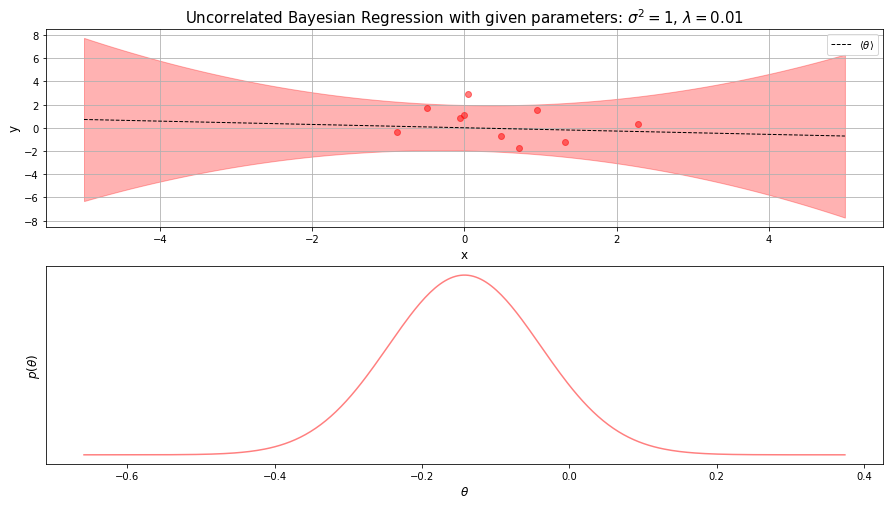

In [4]:
SIGMA_SQUARED = 1
LAMBDA = 0.01
fixed_model_params = {"sigma_squared": SIGMA_SQUARED, "lambda": LAMBDA}

model = UncorrelatedBayes(SIGMA_SQUARED, LAMBDA)
model.fit(x=x, y=y)

xs = tf.reshape(tf.linspace(-5., 5., 100), [-1,1,1])
ms = [model.predict(x) for x in xs]
mus = to_list([m.mean() for m in ms])
low = to_list([m.quantile(0.025) for m in ms])
high = to_list([m.quantile(0.975) for m in ms])
grid = to_list(xs)
plot(data_train, model.mu, model.sigma, grid=grid, mus=mus, lows=low, highs=high, model_params=fixed_model_params)

# Neural Network with Tensorflow / Keras 

In [5]:
import tensorflow_probability as tfp
from tensorflow import keras
from tensorflow.keras import layers

neg_log_likelihood = lambda y, rv: -rv.log_prob(y)

def build_model():
    """Regularization via kernel and bias regularizer"""
    model = keras.Sequential([
        layers.Dense(1, activation='linear', input_shape=[D]), 
        tfp.layers.DistributionLambda(lambda t: tfd.Normal(loc=t, scale=1)) 
    ])
    
    model.compile(loss=neg_log_likelihood)
    return model

model = build_model()
model.summary()
model.fit(x, y, epochs=1000, verbose=True)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
_________________________________________________________________
distribution_lambda (Distrib ((None, 1), (None, 1))    0         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
Train on 10 samples
Epoch 1/1000
10/10 [==============================] - 0s 24ms/sample - loss: 2.4624
Epoch 2/1000
10/10 [==============================] - 0s 138us/sample - loss: 2.4591
Epoch 3/1000
10/10 [==============================] - 0s 299us/sample - loss: 2.4567
Epoch 4/1000
10/10 [==============================] - 0s 274us/sample - loss: 2.4547
Epoch 5/1000
10/10 [==============================] - 0s 275us/sample - loss: 2.4529
Epoch 6/1000
10/10 [==============================] - 0s 293us/sample - loss: 2.

Epoch 90/1000
10/10 [==============================] - 0s 374us/sample - loss: 2.3657
Epoch 91/1000
10/10 [==============================] - 0s 354us/sample - loss: 2.3648
Epoch 92/1000
10/10 [==============================] - 0s 1ms/sample - loss: 2.3639
Epoch 93/1000
10/10 [==============================] - 0s 441us/sample - loss: 2.3629
Epoch 94/1000
10/10 [==============================] - 0s 402us/sample - loss: 2.3620
Epoch 95/1000
10/10 [==============================] - 0s 438us/sample - loss: 2.3611
Epoch 96/1000
10/10 [==============================] - 0s 629us/sample - loss: 2.3602
Epoch 97/1000
10/10 [==============================] - 0s 641us/sample - loss: 2.3592
Epoch 98/1000
10/10 [==============================] - 0s 774us/sample - loss: 2.3583
Epoch 99/1000
10/10 [==============================] - 0s 233us/sample - loss: 2.3574
Epoch 100/1000
10/10 [==============================] - 0s 359us/sample - loss: 2.3565
Epoch 101/1000
10/10 [==============================] -

Epoch 185/1000
10/10 [==============================] - 0s 222us/sample - loss: 2.2810
Epoch 186/1000
10/10 [==============================] - 0s 701us/sample - loss: 2.2802
Epoch 187/1000
10/10 [==============================] - 0s 346us/sample - loss: 2.2793
Epoch 188/1000
10/10 [==============================] - 0s 238us/sample - loss: 2.2785
Epoch 189/1000
10/10 [==============================] - 0s 444us/sample - loss: 2.2776
Epoch 190/1000
10/10 [==============================] - 0s 313us/sample - loss: 2.2768
Epoch 191/1000
10/10 [==============================] - 0s 298us/sample - loss: 2.2759
Epoch 192/1000
10/10 [==============================] - 0s 318us/sample - loss: 2.2751
Epoch 193/1000
10/10 [==============================] - 0s 286us/sample - loss: 2.2742
Epoch 194/1000
10/10 [==============================] - 0s 321us/sample - loss: 2.2734
Epoch 195/1000
10/10 [==============================] - 0s 312us/sample - loss: 2.2725
Epoch 196/1000
10/10 [=====================

Epoch 280/1000
10/10 [==============================] - 0s 304us/sample - loss: 2.2034
Epoch 281/1000
10/10 [==============================] - 0s 549us/sample - loss: 2.2026
Epoch 282/1000
10/10 [==============================] - 0s 270us/sample - loss: 2.2019
Epoch 283/1000
10/10 [==============================] - 0s 331us/sample - loss: 2.2011
Epoch 284/1000
10/10 [==============================] - 0s 263us/sample - loss: 2.2003
Epoch 285/1000
10/10 [==============================] - 0s 312us/sample - loss: 2.1995
Epoch 286/1000
10/10 [==============================] - 0s 478us/sample - loss: 2.1988
Epoch 287/1000
10/10 [==============================] - 0s 893us/sample - loss: 2.1980
Epoch 288/1000
10/10 [==============================] - 0s 330us/sample - loss: 2.1972
Epoch 289/1000
10/10 [==============================] - 0s 228us/sample - loss: 2.1964
Epoch 290/1000
10/10 [==============================] - 0s 366us/sample - loss: 2.1957
Epoch 291/1000
10/10 [=====================

Epoch 375/1000
10/10 [==============================] - 0s 197us/sample - loss: 2.1328
Epoch 376/1000
10/10 [==============================] - 0s 457us/sample - loss: 2.1321
Epoch 377/1000
10/10 [==============================] - 0s 381us/sample - loss: 2.1314
Epoch 378/1000
10/10 [==============================] - 0s 303us/sample - loss: 2.1307
Epoch 379/1000
10/10 [==============================] - 0s 309us/sample - loss: 2.1300
Epoch 380/1000
10/10 [==============================] - 0s 692us/sample - loss: 2.1293
Epoch 381/1000
10/10 [==============================] - 0s 275us/sample - loss: 2.1286
Epoch 382/1000
10/10 [==============================] - 0s 399us/sample - loss: 2.1279
Epoch 383/1000
10/10 [==============================] - 0s 286us/sample - loss: 2.1271
Epoch 384/1000
10/10 [==============================] - 0s 293us/sample - loss: 2.1264
Epoch 385/1000
10/10 [==============================] - 0s 518us/sample - loss: 2.1257
Epoch 386/1000
10/10 [=====================

10/10 [==============================] - 0s 442us/sample - loss: 2.0697
Epoch 470/1000
10/10 [==============================] - 0s 318us/sample - loss: 2.0691
Epoch 471/1000
10/10 [==============================] - 0s 306us/sample - loss: 2.0684
Epoch 472/1000
10/10 [==============================] - 0s 340us/sample - loss: 2.0678
Epoch 473/1000
10/10 [==============================] - 0s 515us/sample - loss: 2.0672
Epoch 474/1000
10/10 [==============================] - 0s 453us/sample - loss: 2.0666
Epoch 475/1000
10/10 [==============================] - 0s 504us/sample - loss: 2.0659
Epoch 476/1000
10/10 [==============================] - 0s 404us/sample - loss: 2.0653
Epoch 477/1000
10/10 [==============================] - 0s 499us/sample - loss: 2.0647
Epoch 478/1000
10/10 [==============================] - 0s 445us/sample - loss: 2.0640
Epoch 479/1000
10/10 [==============================] - 0s 343us/sample - loss: 2.0634
Epoch 480/1000
10/10 [==============================] - 0s

Epoch 564/1000
10/10 [==============================] - 0s 362us/sample - loss: 2.0129
Epoch 565/1000
10/10 [==============================] - 0s 362us/sample - loss: 2.0123
Epoch 566/1000
10/10 [==============================] - 0s 358us/sample - loss: 2.0118
Epoch 567/1000
10/10 [==============================] - 0s 490us/sample - loss: 2.0112
Epoch 568/1000
10/10 [==============================] - 0s 244us/sample - loss: 2.0106
Epoch 569/1000
10/10 [==============================] - 0s 218us/sample - loss: 2.0101
Epoch 570/1000
10/10 [==============================] - 0s 526us/sample - loss: 2.0095
Epoch 571/1000
10/10 [==============================] - 0s 918us/sample - loss: 2.0090
Epoch 572/1000
10/10 [==============================] - 0s 583us/sample - loss: 2.0084
Epoch 573/1000
10/10 [==============================] - 0s 326us/sample - loss: 2.0079
Epoch 574/1000
10/10 [==============================] - 0s 315us/sample - loss: 2.0073
Epoch 575/1000
10/10 [=====================

Epoch 659/1000
10/10 [==============================] - 0s 253us/sample - loss: 1.9630
Epoch 660/1000
10/10 [==============================] - 0s 273us/sample - loss: 1.9625
Epoch 661/1000
10/10 [==============================] - 0s 403us/sample - loss: 1.9620
Epoch 662/1000
10/10 [==============================] - 0s 535us/sample - loss: 1.9615
Epoch 663/1000
10/10 [==============================] - 0s 340us/sample - loss: 1.9610
Epoch 664/1000
10/10 [==============================] - 0s 972us/sample - loss: 1.9605
Epoch 665/1000
10/10 [==============================] - 0s 387us/sample - loss: 1.9600
Epoch 666/1000
10/10 [==============================] - 0s 641us/sample - loss: 1.9596
Epoch 667/1000
10/10 [==============================] - 0s 310us/sample - loss: 1.9591
Epoch 668/1000
10/10 [==============================] - 0s 438us/sample - loss: 1.9586
Epoch 669/1000
10/10 [==============================] - 0s 642us/sample - loss: 1.9581
Epoch 670/1000
10/10 [=====================

Epoch 754/1000
10/10 [==============================] - 0s 268us/sample - loss: 1.9200
Epoch 755/1000
10/10 [==============================] - 0s 294us/sample - loss: 1.9195
Epoch 756/1000
10/10 [==============================] - 0s 979us/sample - loss: 1.9191
Epoch 757/1000
10/10 [==============================] - 0s 475us/sample - loss: 1.9187
Epoch 758/1000
10/10 [==============================] - 0s 317us/sample - loss: 1.9183
Epoch 759/1000
10/10 [==============================] - 0s 317us/sample - loss: 1.9179
Epoch 760/1000
10/10 [==============================] - 0s 281us/sample - loss: 1.9175
Epoch 761/1000
10/10 [==============================] - 0s 503us/sample - loss: 1.9171
Epoch 762/1000
10/10 [==============================] - 0s 2ms/sample - loss: 1.9167
Epoch 763/1000
10/10 [==============================] - 0s 418us/sample - loss: 1.9162
Epoch 764/1000
10/10 [==============================] - 0s 298us/sample - loss: 1.9158
Epoch 765/1000
10/10 [=======================

Epoch 849/1000
10/10 [==============================] - 0s 491us/sample - loss: 1.8838
Epoch 850/1000
10/10 [==============================] - 0s 412us/sample - loss: 1.8835
Epoch 851/1000
10/10 [==============================] - 0s 343us/sample - loss: 1.8832
Epoch 852/1000
10/10 [==============================] - 0s 246us/sample - loss: 1.8828
Epoch 853/1000
10/10 [==============================] - 0s 345us/sample - loss: 1.8825
Epoch 854/1000
10/10 [==============================] - 0s 305us/sample - loss: 1.8821
Epoch 855/1000
10/10 [==============================] - 0s 523us/sample - loss: 1.8818
Epoch 856/1000
10/10 [==============================] - 0s 343us/sample - loss: 1.8815
Epoch 857/1000
10/10 [==============================] - 0s 209us/sample - loss: 1.8811
Epoch 858/1000
10/10 [==============================] - 0s 924us/sample - loss: 1.8808
Epoch 859/1000
10/10 [==============================] - 0s 468us/sample - loss: 1.8804
Epoch 860/1000
10/10 [=====================

Epoch 944/1000
10/10 [==============================] - 0s 424us/sample - loss: 1.8546
Epoch 945/1000
10/10 [==============================] - 0s 200us/sample - loss: 1.8543
Epoch 946/1000
10/10 [==============================] - 0s 422us/sample - loss: 1.8541
Epoch 947/1000
10/10 [==============================] - 0s 333us/sample - loss: 1.8538
Epoch 948/1000
10/10 [==============================] - 0s 295us/sample - loss: 1.8535
Epoch 949/1000
10/10 [==============================] - 0s 361us/sample - loss: 1.8533
Epoch 950/1000
10/10 [==============================] - 0s 498us/sample - loss: 1.8530
Epoch 951/1000
10/10 [==============================] - 0s 347us/sample - loss: 1.8527
Epoch 952/1000
10/10 [==============================] - 0s 792us/sample - loss: 1.8525
Epoch 953/1000
10/10 [==============================] - 0s 297us/sample - loss: 1.8522
Epoch 954/1000
10/10 [==============================] - 0s 748us/sample - loss: 1.8519
Epoch 955/1000
10/10 [=====================

In [7]:
model(xs).mean()

<tf.Tensor: shape=(100, 1, 1), dtype=float32, numpy=
array([[[-5.202305  ]],

       [[-5.103921  ]],

       [[-5.005537  ]],

       [[-4.907153  ]],

       [[-4.8087697 ]],

       [[-4.710386  ]],

       [[-4.6120024 ]],

       [[-4.5136185 ]],

       [[-4.415235  ]],

       [[-4.3168507 ]],

       [[-4.218467  ]],

       [[-4.1200833 ]],

       [[-4.0216994 ]],

       [[-3.923316  ]],

       [[-3.8249323 ]],

       [[-3.7265484 ]],

       [[-3.6281648 ]],

       [[-3.529781  ]],

       [[-3.4313972 ]],

       [[-3.3330135 ]],

       [[-3.2346299 ]],

       [[-3.1362462 ]],

       [[-3.0378623 ]],

       [[-2.9394786 ]],

       [[-2.8410947 ]],

       [[-2.742711  ]],

       [[-2.6443272 ]],

       [[-2.5459435 ]],

       [[-2.4475598 ]],

       [[-2.349176  ]],

       [[-2.2507923 ]],

       [[-2.1524086 ]],

       [[-2.0540247 ]],

       [[-1.9556412 ]],

       [[-1.8572574 ]],

       [[-1.7588737 ]],

       [[-1.6604899 ]],

       [[-1.5621063 ]]

In [9]:
from tensorflow_probability import edward2 as ed

# Using the estimator API
* within the estimator API the number of training steps is controlled via the the `dataset`
* more precisely via the `repeat` keyword

# Sklearn 

# Comparision of results